**Silhouette Score**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data']],
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df = iris_df.rename(columns={'sepal_width': 'sepal_width',
                                  'sepal_length': 'sepal_length',
                                  'petal_width': 'petal_width',
                                  'petal_length': 'petal_length'})
print(iris_df[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']].head())

   sepal_width  sepal_length  petal_width  petal_length
0          3.5           5.1          0.2           1.4
1          3.0           4.9          0.2           1.4
2          3.2           4.7          0.2           1.3
3          3.1           4.6          0.2           1.5
4          3.6           5.0          0.2           1.4


<function matplotlib.pyplot.show(close=None, block=None)>

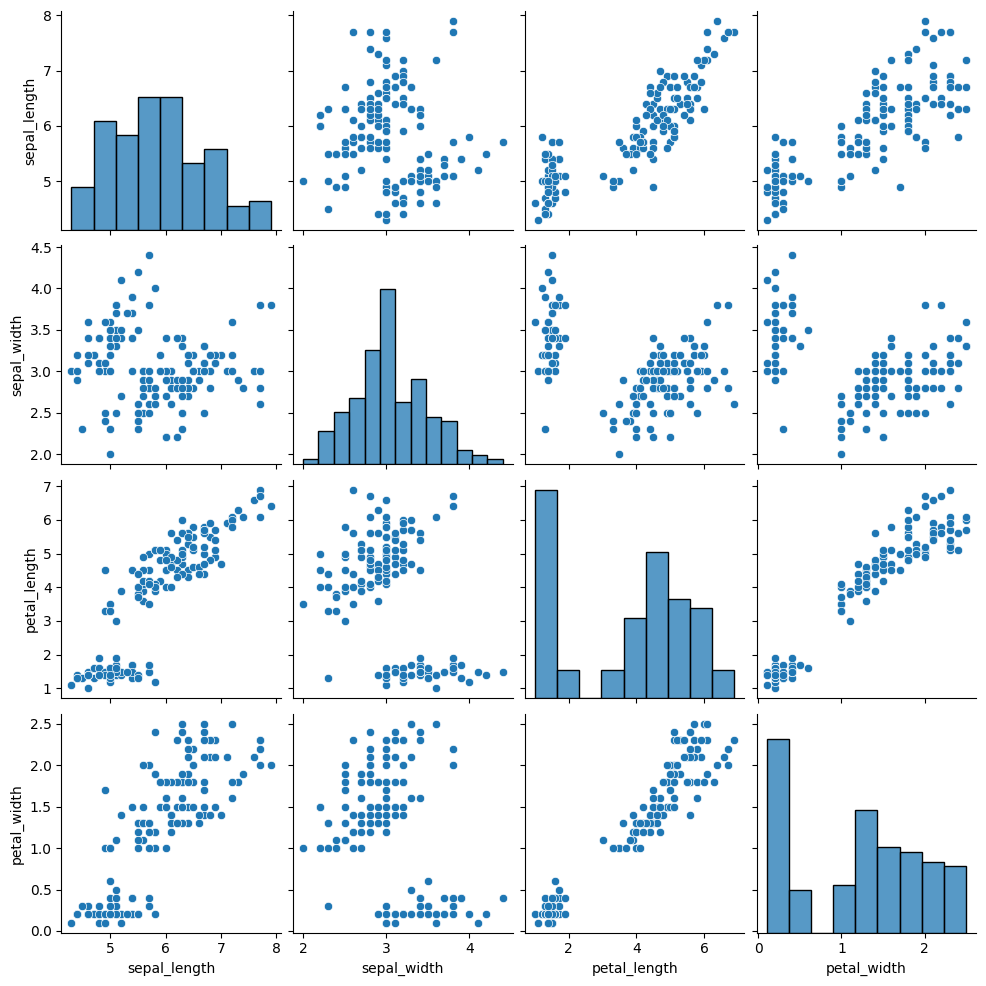

In [23]:
sns.pairplot(iris_df)
plt.show

In [24]:
wcss = []
for i in range(2,21):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(iris_df)
  wcss.append(kmeans.inertia_)

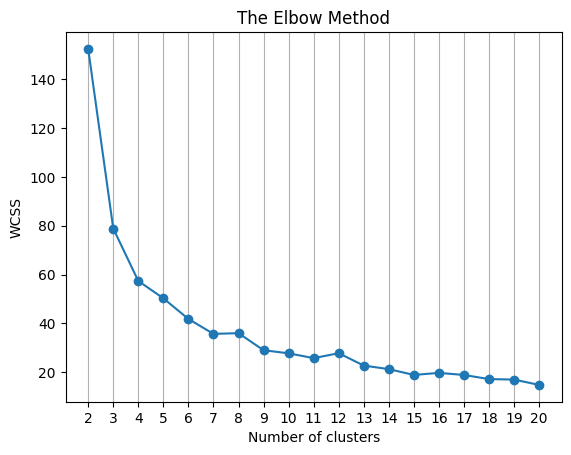

In [25]:
plt.plot([i for i in range(2,21)], wcss, marker='o' )
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()

In [26]:
kmn = KMeans(n_clusters=3)
iris_df['Predict']=kmn.fit_predict(iris_df)
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [27]:
silhouette_score(iris_df, kmn.labels_)

np.float64(0.68468524942902)

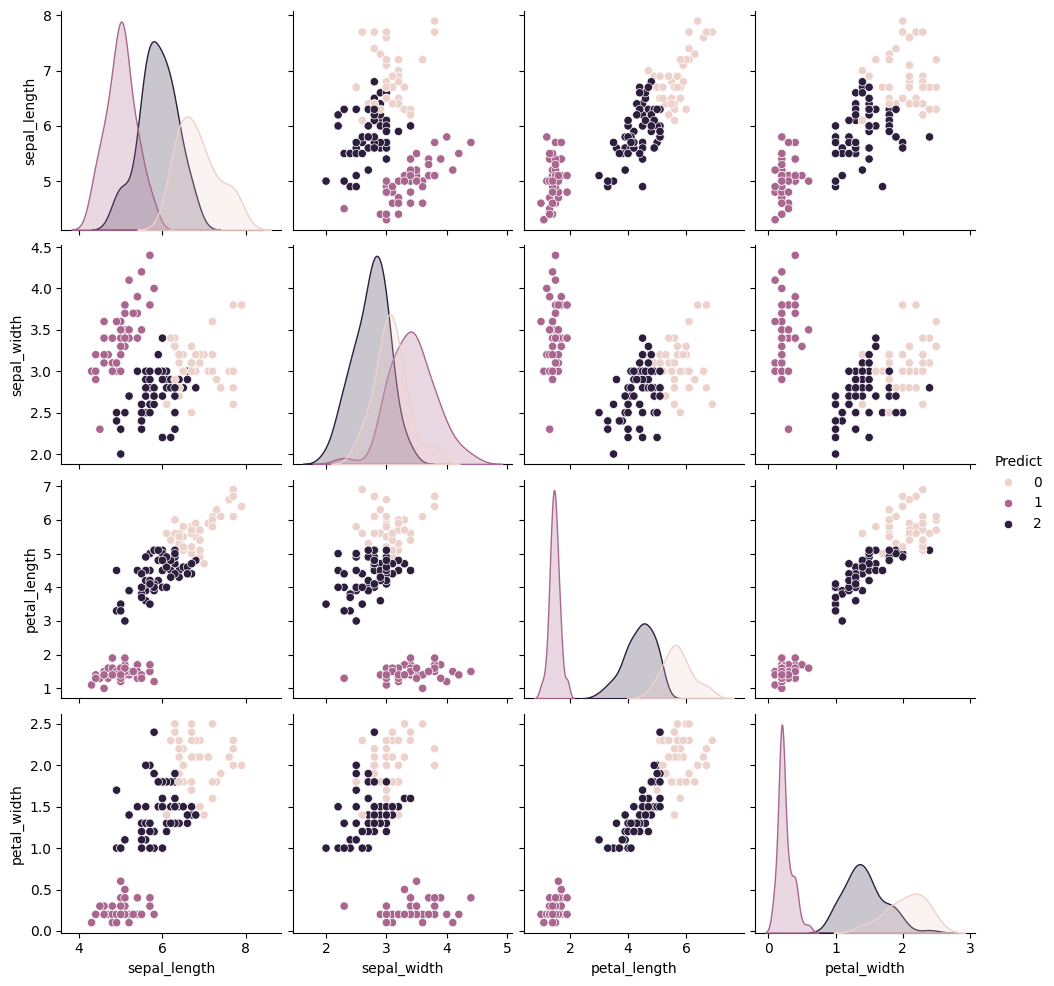

In [28]:
sns.pairplot(iris_df, hue='Predict')
plt.show()

In [29]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
  kmn = KMeans(n_clusters=i)
  kmn.fit(iris_df)
  ss.append(silhouette_score(iris_df, kmn.labels_))

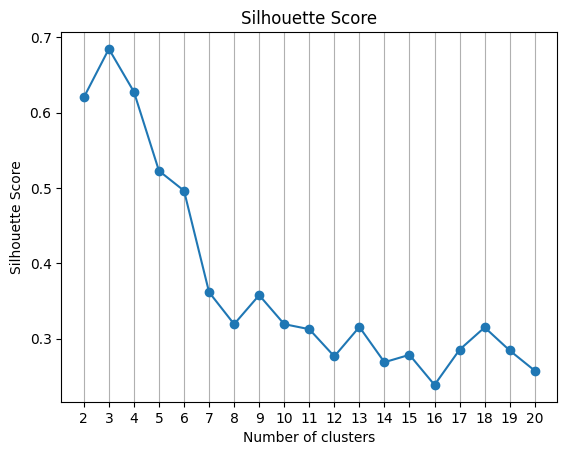

In [30]:
plt.plot(no_c, ss, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()